---
---

# <center><font color='black'>Toy Example: Single Parameter Inference</font></center> <a class="tocSkip">
    
### <center><font color='black'>Nicolai Haug</font></center> <a class="tocSkip">
    
### <center><font color='black'>2021</font></center> <a class="tocSkip">
    
---
---

# Table of Contents <a class="tocSkip">

* [Introduction](#introduction)
    * [Configure Notebook](#configure) 

# Introduction <a name="introduction"></a> 

In the following we develop a toy problem for single parameter inference. More specifically, we will look at the Gaussian distribution from a Bayesian point of view. The Bayesian paradigm differs from the frequentist in that each parameter is assumed to be a random variable with a prior density. 

will infer the unknown variance $\sigma^2$ of a zero-mean Gaussian distribution. Hence, the inference will be on a model with only a single free parameter. The Gaussian distribution is among the family   The likelihood function is

analytically tractable


The inference will be on model with only a single free parameter. 

In the following we develop a toy problem to apply approximate Bayesian computation on for parameter inference. 

Introduce notebook

In the following we develop some problem formulations to apply Bayesian analysis on for parameter inference.
We will focus on situations where closed forms are available. Such models are sometimes unrealistic, but their analysis often provides a useful starting point when it comes to constructing more realistic models. The standard distributions – binomial, normal, Poisson and exponential – have natural derivations from simple probability models

Infer the unknown variance $\sigma^2$ of a zero-mean Gaussian distribution. 

Likelihood: 

$$p (y | \sigma^2) \sim \mathrm{N}(\mu=0, \sigma^2)$$

### Prior 

The Inverse Gamma distribution is conjugate prior for the unknown variance of a Gaussian distribution: 

$$\pi \left(\sigma^2 \right) \sim \text{Inv-Gamma}(\alpha, \beta)$$


### Posterior

The posterior is then 

$$p(\sigma^2|y) \sim \text{Inv-Gamma}(\alpha',\beta')$$ 

with

$$
\alpha'=\alpha + \frac{N_\mathrm{samp}}{2} \quad \mathrm{and} \quad \beta'=\beta+\frac{1}{2} \sum_k y_k^2 .
$$

## Configure Notebook <a name="configure"></a>

<div class="alert alert-block alert-info" style="background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-circle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
        Run the cell below to configure the notebook. 
    </p>
<div>
</div>
</div>

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from IPython.display import display
from latex_envs.latex_envs import figcaption 
from matplotlib import cm
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import default_rng

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn')
sns.set()
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": "0.96"})

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=True)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Problem

Infer the unknown variance $\sigma^2$ of a zero-mean Gaussian distribution. 

Likelihood: 

$$p (y | \sigma^2) \sim \mathrm{N}(\mu=0, \sigma^2)$$

### Prior 

The Inverse Gamma distribution is conjugate prior for the unknown variance of a Gaussian distribution: 

$$\pi \left(\sigma^2 \right) \sim \text{Inv-Gamma}(\alpha, \beta)$$


### Posterior

The posterior is then 

$$p(\sigma^2|y) \sim \text{Inv-Gamma}(\alpha',\beta')$$ 

with

$$
\alpha'=\alpha + \frac{N_\mathrm{samp}}{2} \quad \mathrm{and} \quad \beta'=\beta+\frac{1}{2} \sum_k y_k^2 .
$$

Let the observed sample to carry out inferences be a vector 

\begin{equation*}
    D = [y_1, ..., y_n]^T
\end{equation*}

whose entries are $n$ *independent and identically distributed* (i.i.d.) draws from a univariate Gaussian, or normal, distribution. The *probability density function* (pdf) of a generic draw $y_i$ has two parameters, the *mean* $\mu$ and the *variance* $\sigma^2$: 

\begin{equation}
    p \left(y_i \mid \mu, \sigma^2 \right) = \left(2 \pi \sigma^2 \right)^{-1/2} \exp \left( - \frac{1}{2\sigma^2} \left(y_i - \mu \right)^2 \right) \tag{1}
\end{equation}

Since $y_1, ..., y_n$ are independent, the likelihood is: 

\begin{equation*}
    p \left(D \mid \mu, \sigma^2 \right) = \prod_{i=1}^{n} p \left(y_i \mid \mu, \sigma^2 \right) = \left(2\pi \sigma^2 \right)^{-n/2} \exp \left( - \frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \mu \right)^2 \right) \tag{2}
\end{equation*}



# Inference

Task: infer variance parameter in zero-centered Gaussian model

**Observation**

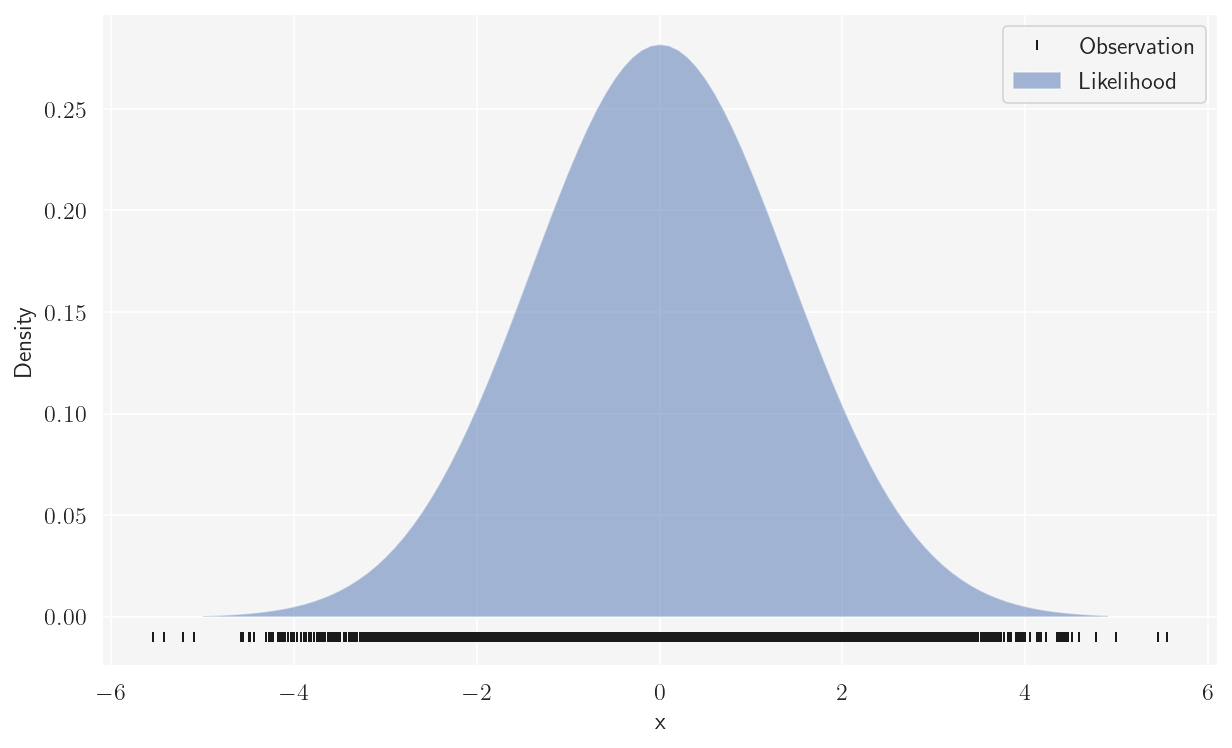

In [2]:
from pylfi.plots import histplot, kdeplot, rugplot
from pylfi.priors import InvGamma, Normal, Uniform

groundtruth = 2.0  # true variance
N = 10000          # number of observations

# specify domain
(dmin, dmax) = (-5, 5)
x = np.arange(dmin, dmax, (dmax - dmin) / 100.)

# observed data
likelihood = Normal(loc=0, scale=np.sqrt(groundtruth),
                    name='observation', seed=42)
likelihood_pdf = likelihood.pdf(x)
obs_data = likelihood.rvs(size=N)

sigma_noise = 0.1
noise = np.random.RandomState().normal(0, sigma_noise, N)
#obs_data += noise


fig = plt.figure(figsize=(10, 6))
kdeplot(x, likelihood_pdf, fill=True, label='Likelihood')
rugplot(obs_data, label='Observation')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

**Prior**

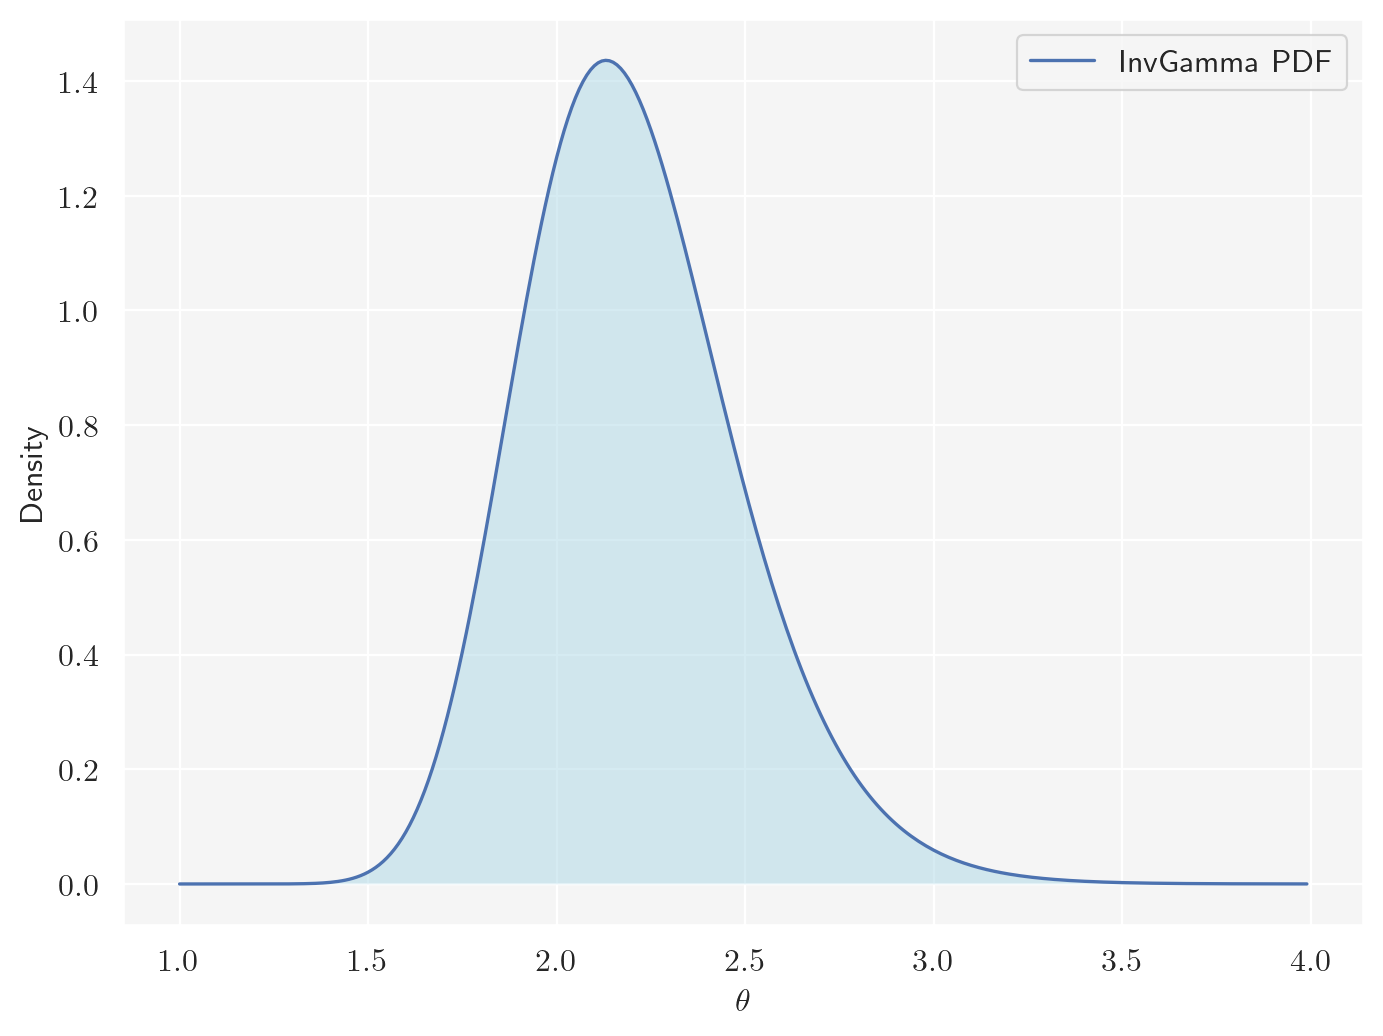

In [3]:
a = 1
b = 4
x = np.arange(a, b, 0.01)

alpha = 60         # prior hyperparameter (inverse gamma distribution)
beta = 130         # prior hyperparameter (inverse gamma distribution)

# prior
theta = InvGamma(alpha, loc=0, scale=beta, seed=42, name='theta', tex=r'$\theta$')
priors = [theta] 
theta.plot_prior(x)
plt.show()

**True posterior**

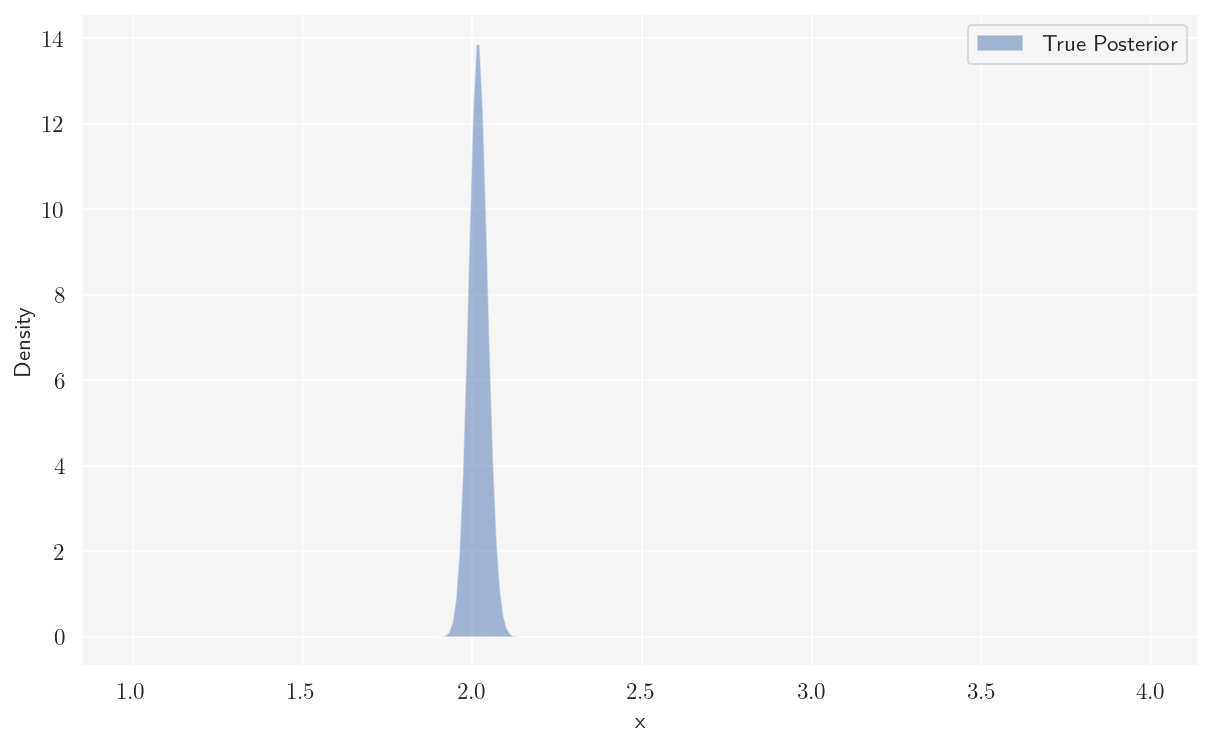

In [4]:


alphaprime = alpha + N / 2
betaprime = beta + 0.5 * np.sum(obs_data**2)
posterior = InvGamma(alphaprime, loc=0, scale=betaprime,
                     name='posterior', seed=42)
posterior_pdf = posterior.pdf(x)
fig = plt.figure(figsize=(10, 6))
kdeplot(x, posterior_pdf, fill=True, label='True Posterior')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

**Setup for inference**

In [5]:
def summary_statistic(data):
    return np.var(data)


def simulator(theta, seed=42, N=10000):
    """Simulator model, returns summary statistic"""
    model = Normal(loc=0, scale=np.sqrt(theta), name='simulator', seed=seed)
    sim = model.rvs(size=N)
    sim_sumstat = summary_statistic(sim)
    return sim_sumstat

In [6]:
from pylfi.inferences import RejectionABC

# observation
#observation = groundtruth
observation = summary_statistic(obs_data)

# initialize sampler
sampler = RejectionABC(observation, simulator, priors, distance='l2')

# inference config
num_simulations = 1000
epsilon = 0.2

# run inference
journal = sampler.sample(num_simulations, epsilon)

INFO:RejectionABC Initializing Rejection ABC inference scheme.
INFO:RejectionABC Running simulator with prior samples.


INFO:RejectionABC Sampling results written to journal.
INFO:RejectionABC Accepted 471 of 1000 simulations.
INFO:Journal  Initializing post-sampling processing.


In [7]:
print(f"{journal.get_acceptance_ratio=}")

journal.get_acceptance_ratio=0.471


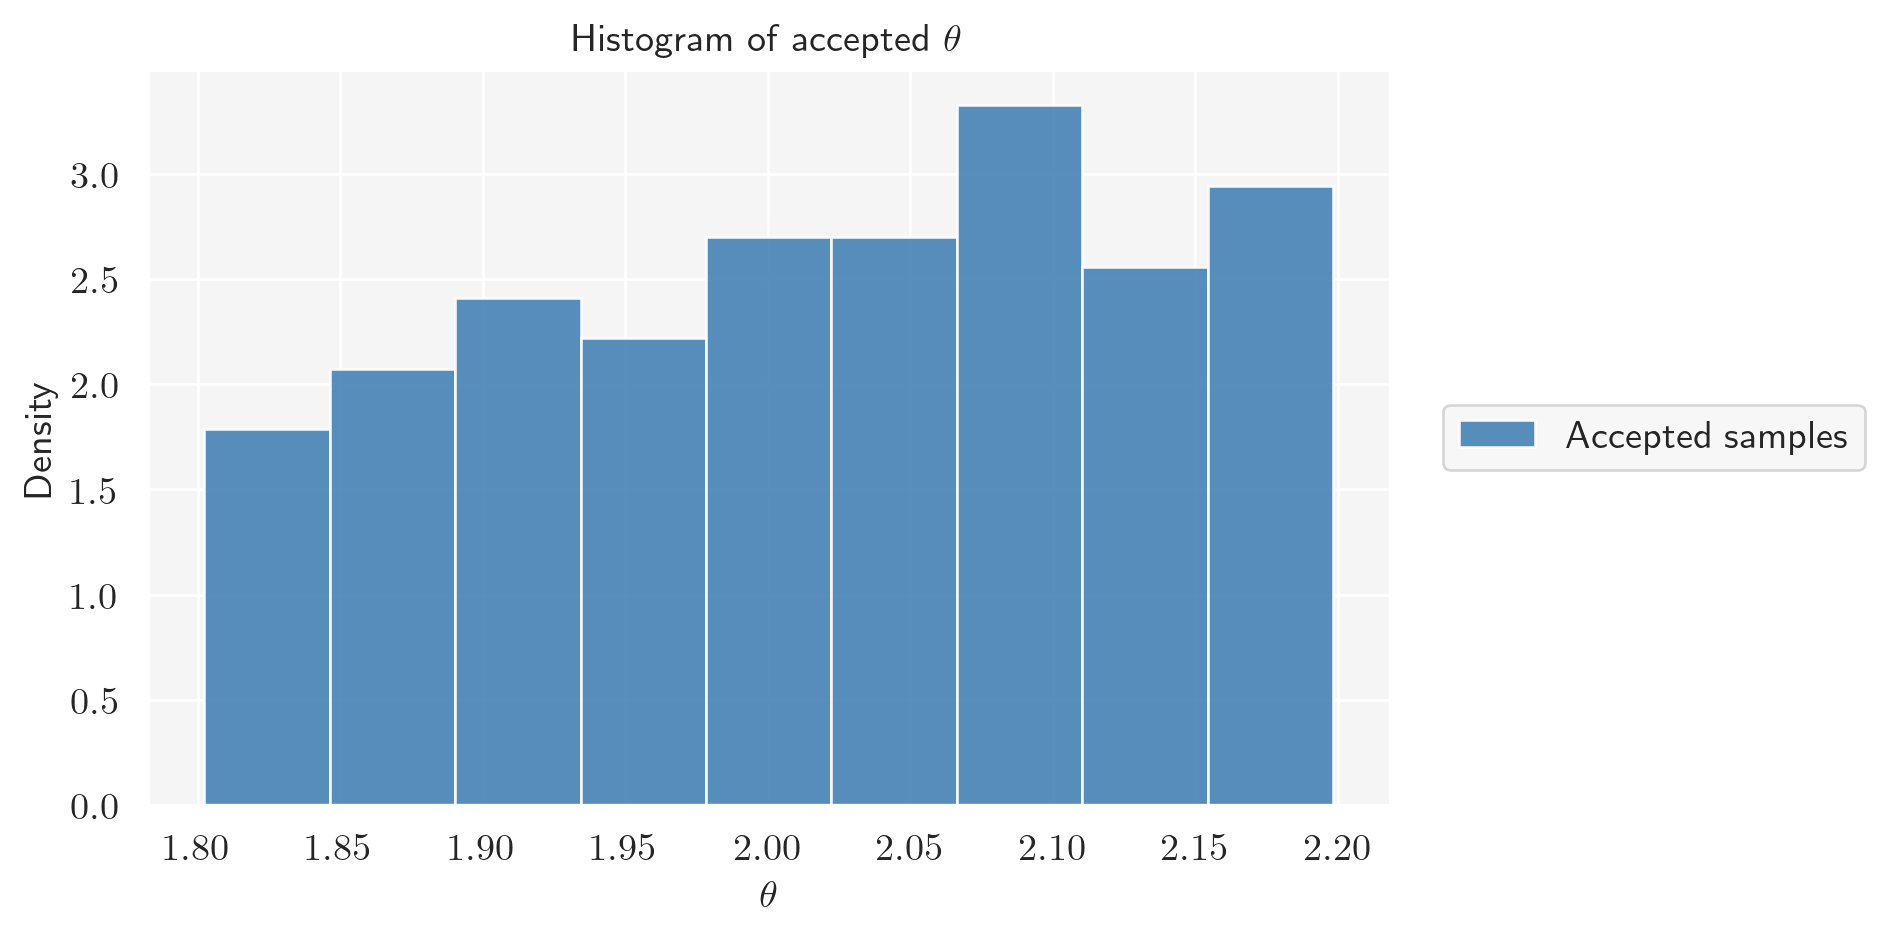

In [8]:
journal.histplot(bins='knuth',
                 figsize=(8, 4),
                 # rug=True,
                 plot_style='pylfi',
                 # point_estimate='mean',
                 # true_parameter_values=[groundtruth]
                 )

# Linear relationship?

Plot relationship between the unknown probability parameter theta and the simulated simulated summary statistic. Each point in the plot represents a particular value of proposal theta and the corresponding distance between the simulated summary statistic, s_sim, and the observed, s_obs.

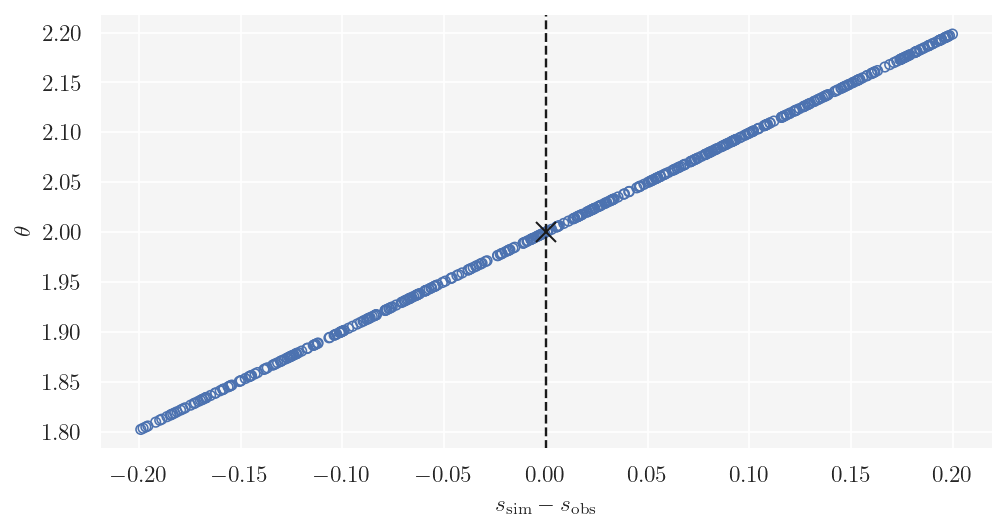

In [9]:

samples = np.asarray(journal.get_accepted_parameters["theta"])
distances = np.asarray(journal.get_raw_distances)

fig = plt.figure(figsize=(8, 4))
plt.scatter(distances, samples, facecolors='none', edgecolor='C0')
plt.xlabel(r'$s_{\mathrm{sim}} - s_{\mathrm{obs}}$')
plt.ylabel(r'$\theta$')
plt.axvline(0, color='k', ls='--')
plt.plot(0, groundtruth, marker='x', markersize=10, color="k")
plt.show()

In [11]:
params = journal.params_as_arrays()
print(type(params))
print(params)

<class 'list'>
[array([2.0910161 , 1.91693435, 1.9169104 , 1.96835654, 1.94150173,
       1.94294416, 2.0405021 , 2.1963594 , 2.13113539, 2.03083101,
       1.90001439, 2.03151578, 2.0852481 , 2.14794466, 1.95745381,
       2.18885138, 1.93098749, 1.80231175, 2.04077633, 1.85102658,
       2.13685085, 1.8808317 , 2.17535389, 2.00605742, 2.04599629,
       2.19300852, 1.9442627 , 1.83857701, 1.95421479, 2.05592117,
       2.10094465, 2.01577772, 2.07844366, 2.02308138, 1.90152247,
       1.81792741, 1.95661582, 1.817131  , 2.07965872, 1.87366199,
       2.05994711, 2.04546189, 2.05581463, 2.15922506, 1.87801826,
       2.17437996, 2.19491199, 2.12806872, 1.86403442, 2.04793284,
       2.18482739, 1.99860035, 2.11611356, 1.98208744, 1.82170093,
       2.02972427, 1.92205294, 1.94581609, 2.05059607, 1.86668411,
       1.98137862, 2.12776703, 2.18637248, 2.12101269, 1.97656118,
       1.87833207, 2.06478232, 2.05437826, 2.19209709, 2.08331645,
       2.00056809, 2.17681554, 2.03801455, 2.0

In [12]:
acc_params = journal.accepted_parameters
print(acc_params)

{'theta': [2.0910161039614263, 1.9169343467683253, 1.9169104001747679, 1.9683565407515209, 1.9415017250529396, 1.942944162920384, 2.0405021048980805, 2.1963594047536183, 2.1311353878423063, 2.030831005023129, 1.9000143887860583, 2.031515778549014, 2.0852480976908696, 2.147944663138819, 1.957453805905826, 2.1888513835160066, 1.930987487696461, 1.8023117481502593, 2.0407763326648127, 1.8510265750746706, 2.1368508513355127, 1.880831695231929, 2.175353889374075, 2.006057415685987, 2.045996288897213, 2.1930085241171153, 1.944262704372913, 1.8385770098635936, 1.9542147922522963, 2.055921166535813, 2.100944654039211, 2.015777716150116, 2.0784436619137825, 2.0230813805275845, 1.901522466978386, 1.8179274070846254, 1.956615822042299, 1.8171309975509136, 2.079658720269226, 1.8736619939061665, 2.059947109569775, 2.045461894519345, 2.0558146316568147, 2.159225055418681, 1.8780182636278284, 2.174379957880839, 2.1949119948002322, 2.1280687180515443, 1.864034417810424, 2.0479328395703886, 2.184827390

In [13]:
df = pd.DataFrame.from_dict(acc_params)

In [14]:
df

,theta
0,2.091016
1,1.916934
2,1.916910
3,1.968357
4,1.941502
...,...
466,2.016388
467,2.081437
468,1.842857
469,1.897170
